# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Analyzing Customer Sentiment
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1HfZvPCWAwKoYl1qogYlxD_CIZYxYw0aI)


![alt text](https://drive.google.com/uc?id=1XGc89Cxi0ooFQIc6o041cz8-qwXg7l3g)


# TASK #2: IMPORT LIBRARIES AND DATASETS


In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [202]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [203]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# TASK #3: EXPLORE DATASET


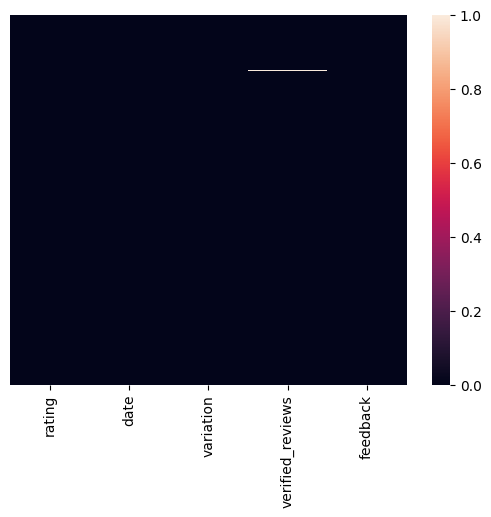

In [204]:
sns.heatmap(reviews_df.isnull(), yticklabels=False)
plt.show()

In [205]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [206]:
# Eksik değer içeren satırları filtreleme
missing_values = reviews_df[reviews_df.isnull().any(axis=1)]
missing_values

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [207]:
reviews_df.dropna(inplace=True)

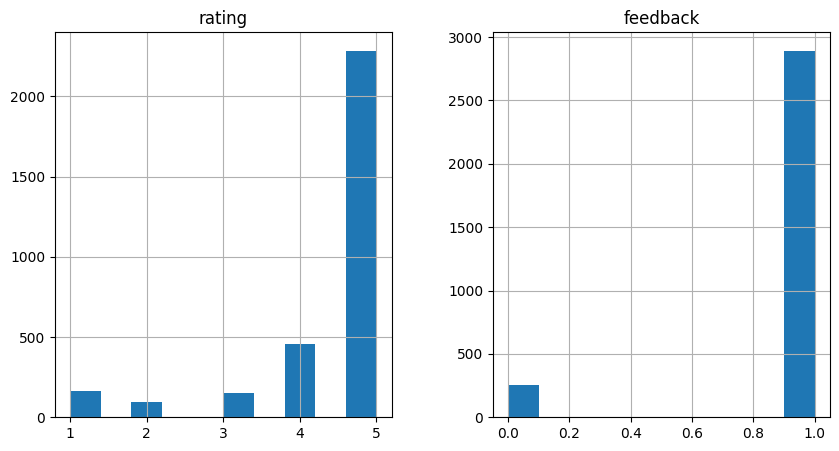

In [208]:
reviews_df.hist(figsize=(10, 5))
plt.show()

In [209]:
import plotly.express as px

for i in reviews_df.select_dtypes("number"):
    fig = px.histogram(reviews_df, x=i)
    fig.show()

In [210]:
reviews_df["length"] = reviews_df["verified_reviews"].apply(len)

In [211]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [212]:
# reviews_df["length"].plot(bins=100, kind="hist")
# plt.show()

px.histogram(reviews_df, x="length")

In [213]:
reviews_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [214]:
reviews_df.loc[reviews_df["length"] ==
               reviews_df["length"].max(), "verified_reviews"].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [215]:
reviews_df.loc[reviews_df["length"] ==
               reviews_df["length"].min(), "verified_reviews"].iloc[0]

'😍'

In [216]:
reviews_df.loc[reviews_df["length"] ==
               int(reviews_df["length"].mean()), "verified_reviews"].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [217]:
positive = reviews_df[reviews_df["feedback"] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [218]:
negative = reviews_df[reviews_df["feedback"] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [219]:
# sns.countplot(x='feedback', data=reviews_df, hue="feedback")
# plt.show()

px.histogram(reviews_df, x='feedback', color='feedback', barmode='group')

In [220]:
px.histogram(reviews_df, x="rating", color="rating")

C:\Users\batu_\AppData\Local\Temp\ipykernel_15512\3051492618.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




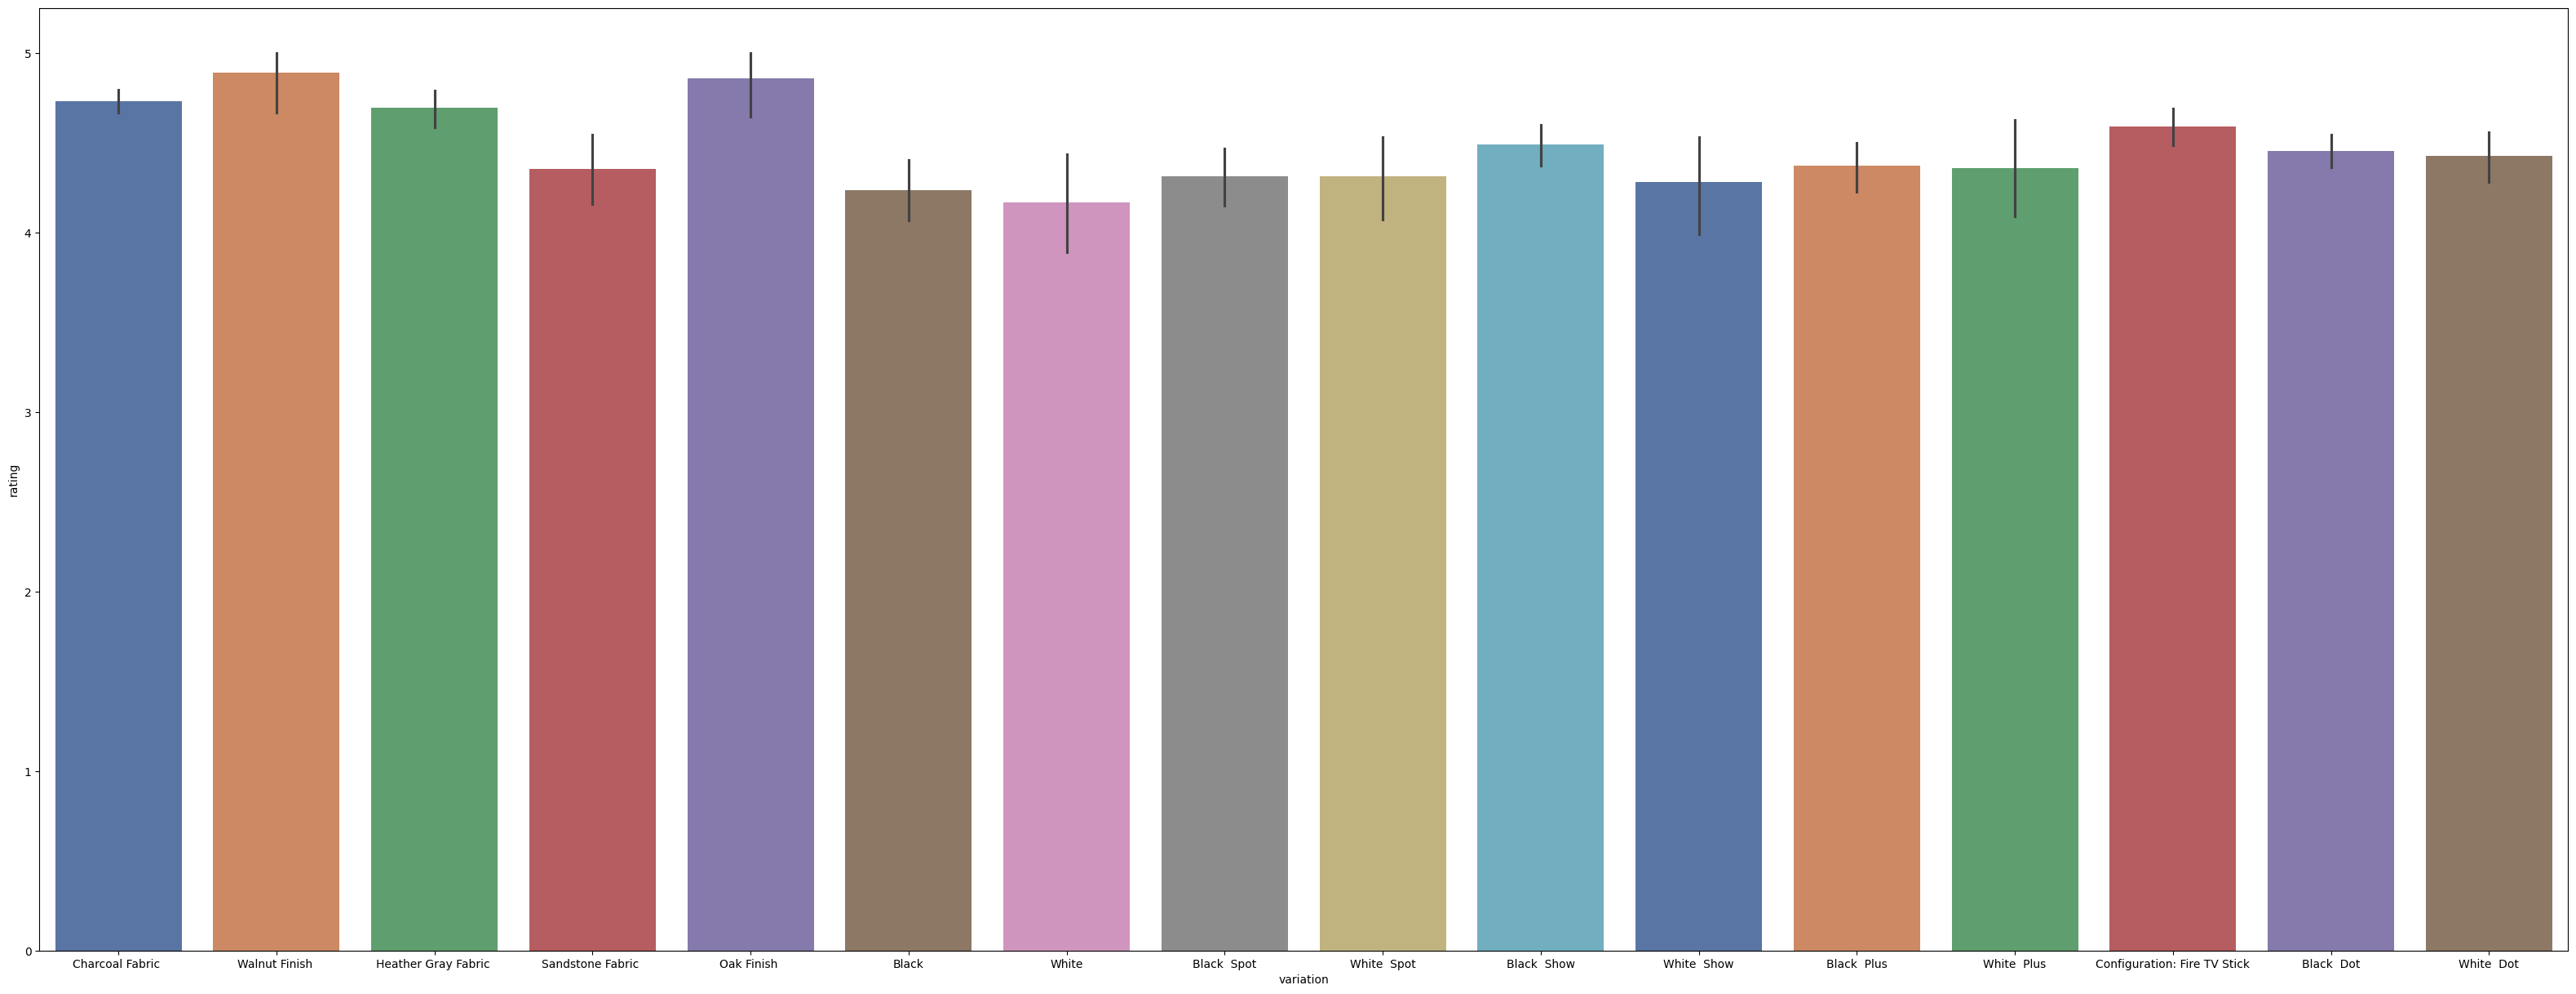

In [221]:
plt.figure(figsize=(40, 15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='deep')
plt.show()

In [222]:
px.bar(reviews_df, x="variation", y="rating", color="variation")

In [223]:
sentences = reviews_df["verified_reviews"].tolist()
len(sentences)

3149

In [224]:
sentences_as_one_string = " ".join(sentences)

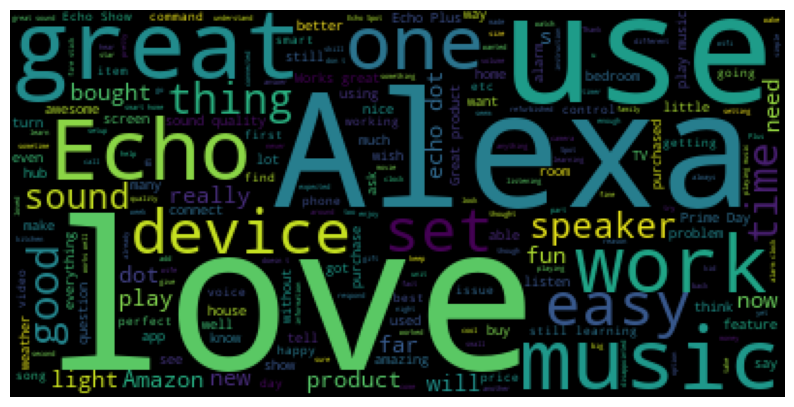

In [225]:
from wordcloud import WordCloud
wc = WordCloud()

plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(sentences_as_one_string))
plt.axis("off")
plt.show()

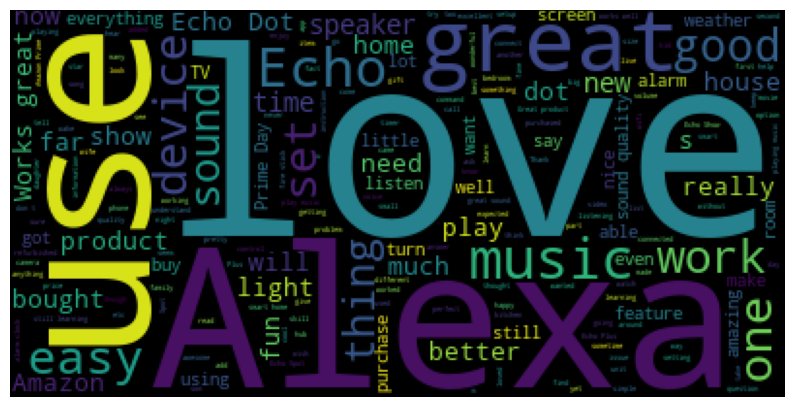

In [226]:
positive_list = positive["verified_reviews"].tolist()
positive_sentences_as_one_string = " ".join(positive_list)

plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(positive_sentences_as_one_string))
plt.axis("off")
plt.show()

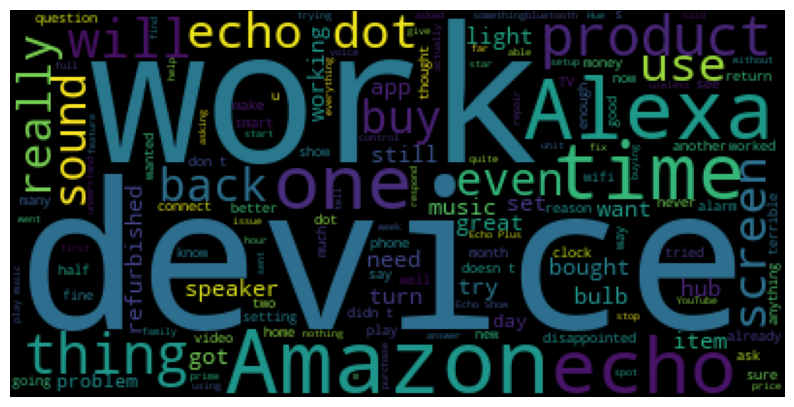

In [227]:
negative_list = negative["verified_reviews"].tolist()
negative_sentences_as_one_string = " ".join(negative_list)

plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(negative_sentences_as_one_string))
plt.axis("off")
plt.show()

# TASK #4: PERFORM DATA CLEANING


In [228]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [229]:
# Avoid Dummy Variable trap which occurs when one variable can be predicted from the other.
variation_dummies = pd.get_dummies(
    reviews_df["variation"], drop_first=True, dtype=int)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [230]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [231]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT


In [232]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [233]:
test = 'Hello Mr. Future, I am so happy to be learning AI now!!'
test_punc_removed = [c for c in test if c not in string.punctuation]

Test_punc_removed_join = "".join(test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

# TASK 6: UNDERSTAND HOW TO REMOVE STOPWORDS


In [234]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\batu_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [236]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split(
) if word.lower() not in stopwords.words("english")]
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

# TASK 7: UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)


![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)


In [237]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.',
               'And this is the third one.', 'Is this the first document?']

count_vec = CountVectorizer()
X = count_vec.fit_transform(sample_data)

In [238]:
count_vec.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [239]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

# TASK #8: PERFORM DATA CLEANING BY APPLYING EVERYTHING WE LEARNED SO FAR!


In [240]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(msg):
    rmv_punc = [c for c in msg if c not in string.punctuation]
    sentences = "".join(rmv_punc)
    rmv_stopwords = [w for w in sentences.split() if w.lower()
                     not in stopwords.words("english")]
    return rmv_stopwords

In [241]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [242]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3149, dtype: object

In [243]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object

In [244]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = count_vec.fit_transform(
    reviews_df['verified_reviews'])

In [245]:
count_vec.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [246]:
reviews_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [247]:
reviews_countvectorizer.shape

(3149, 5211)

In [248]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [249]:
# first let's drop the column
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [250]:
# Now let's concatenate them together
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
# Let's drop the target label coloumns
X = reviews_df.drop(['feedback'], axis=1)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
y = reviews_df['feedback']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3146    1.0
3147    1.0
3148    1.0
3149    1.0
473     NaN
Name: feedback, Length: 3150, dtype: float64

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES


![alt text](https://drive.google.com/uc?id=1Xox54bvjhGOhrG-fSxEUIEgw1R3g-RIt)


![alt text](https://drive.google.com/uc?id=18Z4ug4UuyQG79lyPKs1zQwtrP_S4_yoU)


![alt text](https://drive.google.com/uc?id=1sVLtg8GaE3ZhNEZX1WJbxs7KAQyQ5dpX)


![alt text](https://drive.google.com/uc?id=1NT6Fm-lWUWNsu9i8uzVS4Q5pcm5gp8RK)


![alt text](https://drive.google.com/uc?id=1C32q5Uguymr9012x1lzRD5btnvJ-kW9r)


![alt text](https://drive.google.com/uc?id=1g5aXo5E-RIjRBy6-LLLA8gjG2j9dIL5X)


![alt text](https://drive.google.com/uc?id=106OXP_z89Hqh1JYVaROIbst0N0CgFRuT)


![alt text](https://drive.google.com/uc?id=1AXTHZ9KVUsJjMm9Whc4Adi5T4OznsSYn)


# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL


In [253]:
X.shape

(3150, 5226)

In [254]:
y.shape

(3150,)

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [289]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [281]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = imputer.fit_transform(y_train.to_frame())

In [282]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_imputed, y_train_imputed)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE


![alt text](https://drive.google.com/uc?id=14_ft6Wiu-VaiU_5Ew2nS7EGGr3oLLQf8)


In [283]:
from sklearn.metrics import classification_report, confusion_matrix

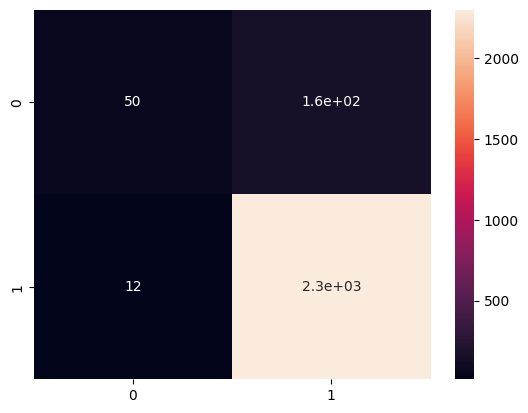

In [286]:
y_predict_train = NB_classifier.predict(X_train_imputed)
cm = confusion_matrix(y_train_imputed, y_predict_train)
sns.heatmap(cm, annot=True)
plt.show()

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but MultinomialNB was fitted without feature names



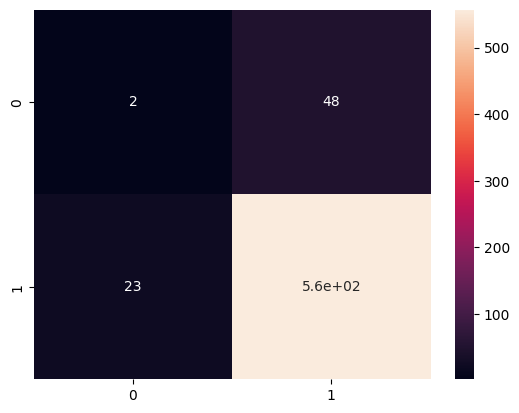

In [294]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.show()

In [295]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.08      0.04      0.05        50
         1.0       0.92      0.96      0.94       580

    accuracy                           0.89       630
   macro avg       0.50      0.50      0.50       630
weighted avg       0.85      0.89      0.87       630



# TASK #12: ASSIGNMENT - TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER


In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [300]:
model = LogisticRegression()
model.fit(X_train_imputed, y_train_imputed)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [301]:
y_pred = model.predict(X_test)

c:\Users\batu_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [302]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 91.26984126984127 %


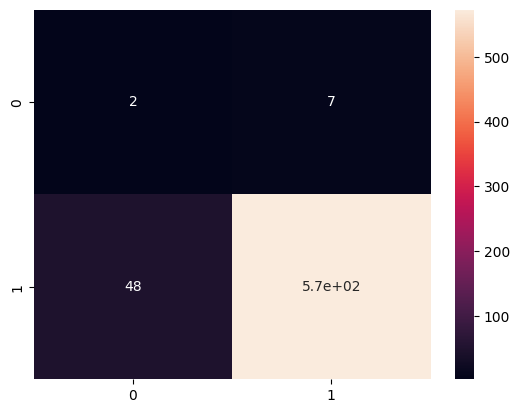

In [304]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [305]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.22      0.04      0.07        50
         1.0       0.92      0.99      0.95       580

    accuracy                           0.91       630
   macro avg       0.57      0.51      0.51       630
weighted avg       0.87      0.91      0.88       630



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS
